In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/telecom_Customer

/gdrive/MyDrive/telecom_Customer


In [4]:
ls

telecom_cus.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [7]:
df_train=pd.read_csv('telecom_cus.csv')
df_train.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [9]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.022000,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.816200,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.000000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.000000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.000000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


# EDA

In [10]:
df_train.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [11]:
df_train.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
df_train.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [13]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [14]:
binary_cols

['marital', 'retire', 'gender']

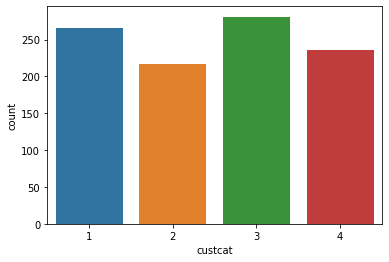

In [15]:
sns.countplot("custcat", data=df_train)

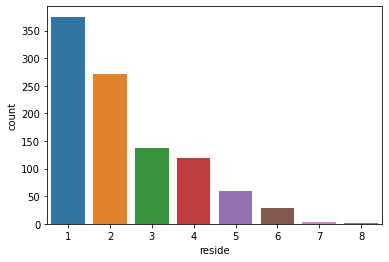

In [16]:
sns.countplot("reside", data=df_train)

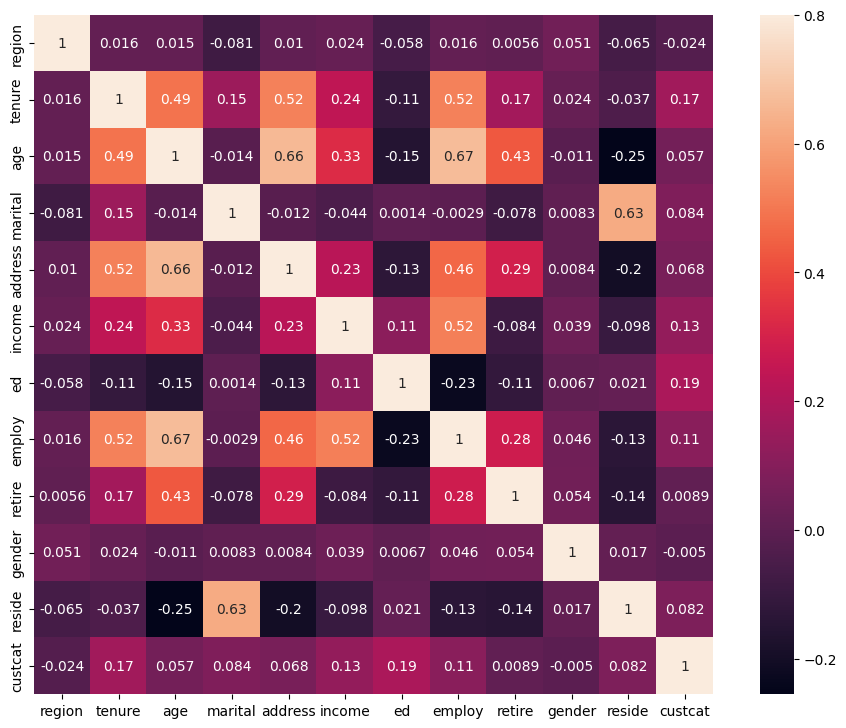

In [17]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

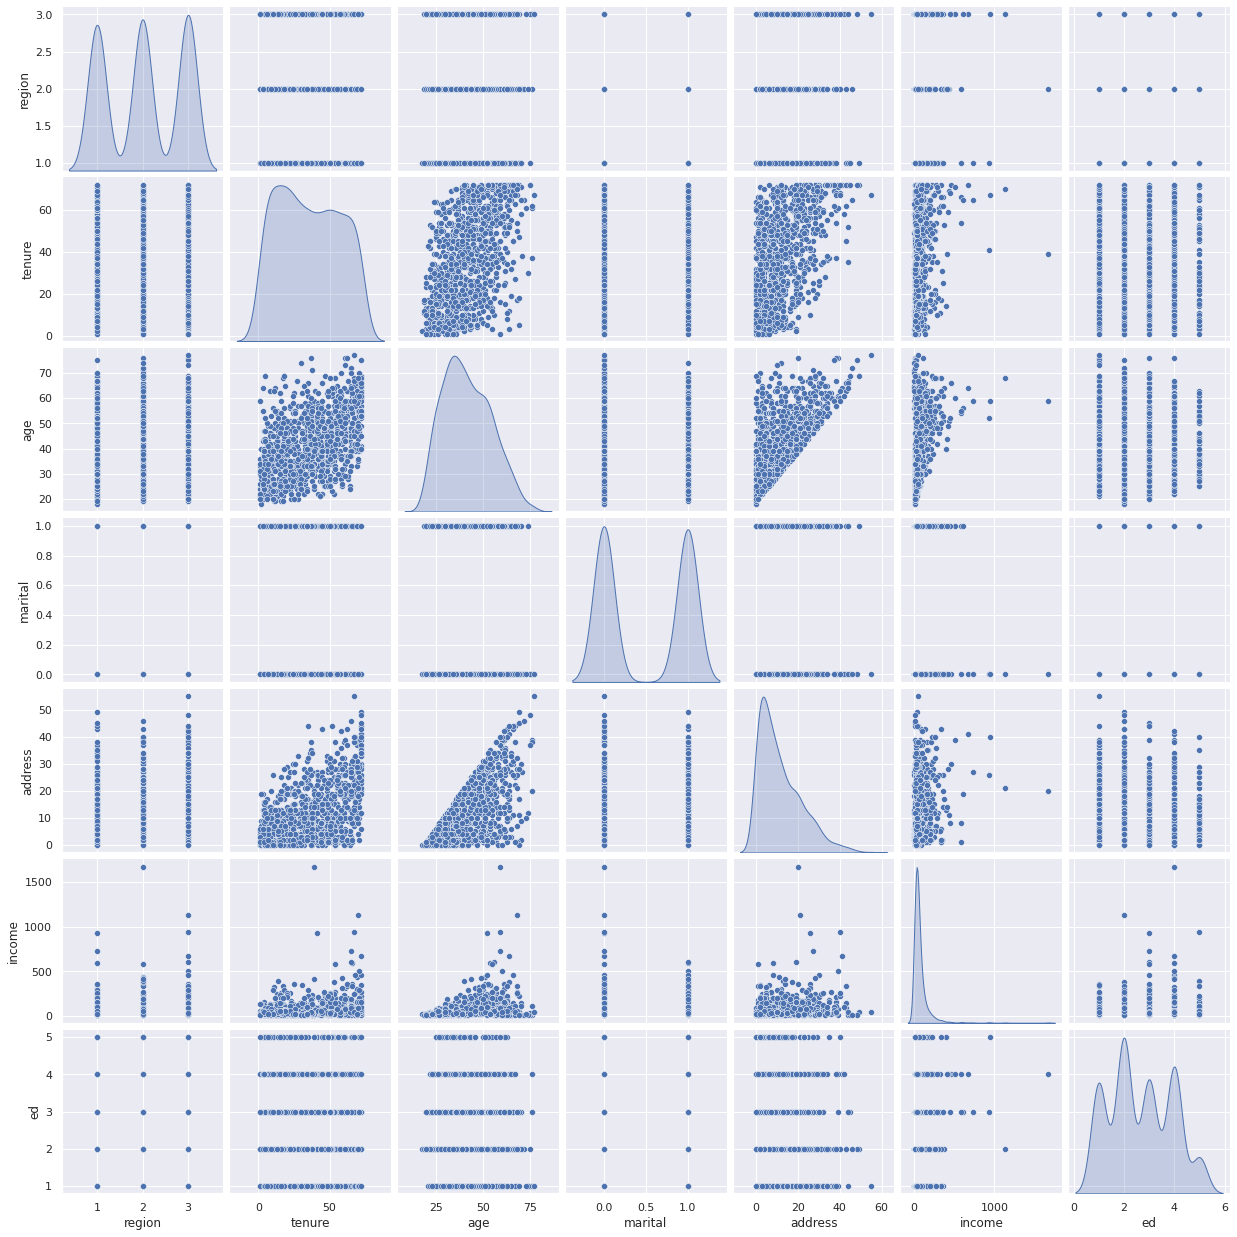

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [19]:

X = df_train.drop(['custcat'], axis = 1)
Y = df_train["custcat"]
x_Data = X.values
y_Data = Y.values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [23]:
model.score(X_test,y_test)

0.35

In [24]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.38125 0.4125  0.36875 0.40625 0.31875]


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [26]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.3925

In [27]:
confusion_matrix(y_train, pred)

array([[144,   3,  41,  18],
       [ 57,  13,  50,  58],
       [ 99,  11,  82,  34],
       [ 70,  20,  25,  75]])

In [28]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [29]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [30]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           1       0.39      0.55      0.46        60
           2       0.12      0.08      0.09        39
           3       0.52      0.42      0.46        55
           4       0.24      0.24      0.24        46

    accuracy                           0.35       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.34      0.35      0.34       200



In [31]:
cma = confusion_matrix(y_test, predicted_test)

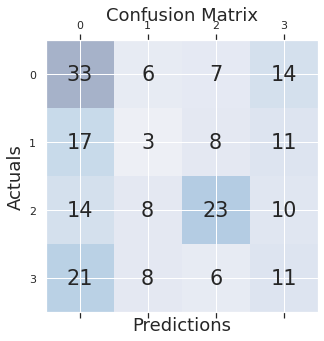

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier as rf

In [34]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [35]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.995

In [36]:
confusion_matrix(y_train, pred)

array([[206,   0,   0,   0],
       [  1, 176,   1,   0],
       [  1,   0, 225,   0],
       [  1,   0,   0, 189]])

In [37]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [38]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [39]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           1       0.46      0.47      0.46        60
           2       0.24      0.18      0.21        39
           3       0.41      0.47      0.44        55
           4       0.28      0.28      0.28        46

    accuracy                           0.37       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.37      0.36       200



In [40]:
cma = confusion_matrix(y_test, pred_test)

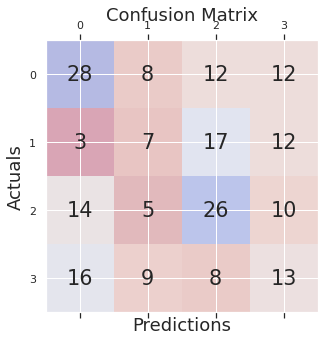

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [42]:
from sklearn import tree

In [43]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [44]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [45]:
confusion_matrix(y_train, pred1)

array([[206,   0,   0,   0],
       [  0, 178,   0,   0],
       [  0,   0, 226,   0],
       [  0,   0,   0, 190]])

In [46]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [47]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           1       0.37      0.37      0.37        60
           2       0.28      0.31      0.29        39
           3       0.38      0.38      0.38        55
           4       0.21      0.20      0.20        46

    accuracy                           0.32       200
   macro avg       0.31      0.31      0.31       200
weighted avg       0.32      0.32      0.32       200



In [48]:
cma = confusion_matrix(y_test, pred1_test)

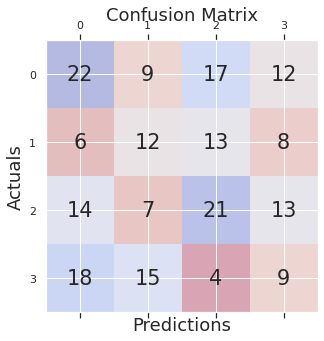

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [51]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.43125

In [52]:
confusion_matrix(y_train, pred_LR)

array([[104,   8,  56,  38],
       [ 22,  51,  46,  59],
       [ 65,  33, 100,  28],
       [ 36,  30,  34,  90]])

In [53]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [54]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           1       0.45      0.42      0.43        60
           2       0.30      0.28      0.29        39
           3       0.49      0.53      0.51        55
           4       0.39      0.41      0.40        46

    accuracy                           0.42       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.42      0.42      0.42       200



In [55]:
cma = confusion_matrix(y_test, pred_LR_test)

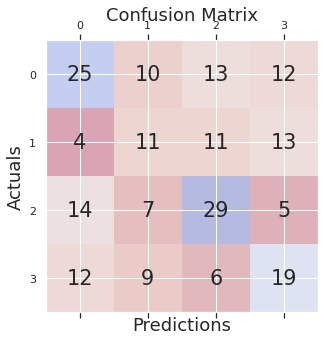

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [59]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.2825

In [60]:
confusion_matrix(y_train, pred_NN)

array([[  0,   0, 206,   0],
       [  0,   0, 178,   0],
       [  0,   0, 226,   0],
       [  0,   0, 190,   0]])

In [61]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [62]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        39
           3       0.28      1.00      0.43        55
           4       0.00      0.00      0.00        46

    accuracy                           0.28       200
   macro avg       0.07      0.25      0.11       200
weighted avg       0.08      0.28      0.12       200



In [63]:
cma = confusion_matrix(y_test, pred_NN_test)

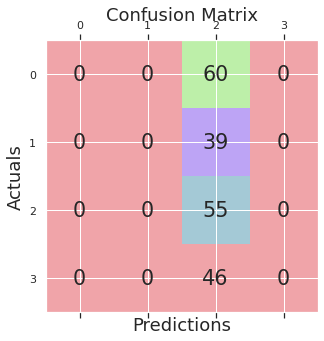

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [65]:
import xgboost as xgb

In [66]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [67]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.6925

In [68]:
confusion_matrix(y_train, pred_XGB)

array([[155,   6,  28,  17],
       [ 16, 113,  24,  25],
       [ 34,  12, 158,  22],
       [ 22,  18,  22, 128]])

In [69]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [70]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           1       0.38      0.40      0.39        60
           2       0.29      0.31      0.30        39
           3       0.39      0.40      0.40        55
           4       0.26      0.22      0.24        46

    accuracy                           0.34       200
   macro avg       0.33      0.33      0.33       200
weighted avg       0.34      0.34      0.34       200



In [71]:
cma = confusion_matrix(y_test, pred_XGB_test)

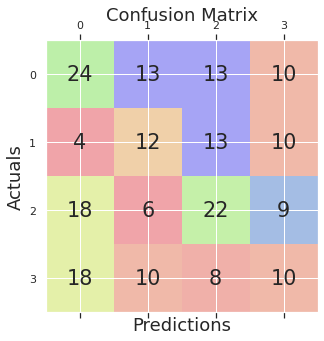

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

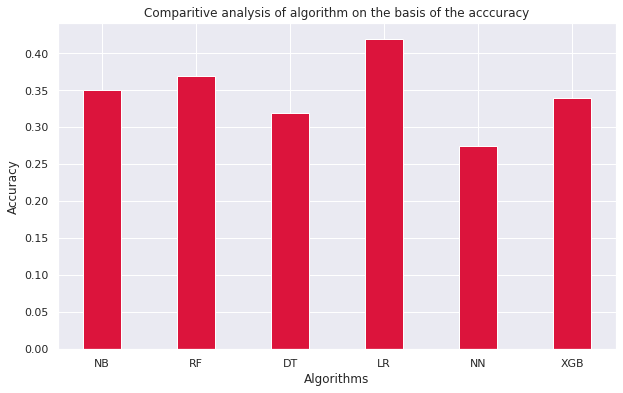

In [73]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


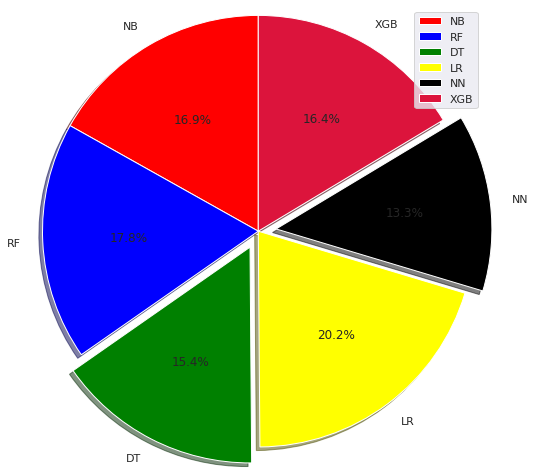

In [74]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [75]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']